In [186]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [187]:
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

In [188]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [189]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [190]:
pyber=city_data.merge(ride_data, on="city", how="outer")
pyber.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

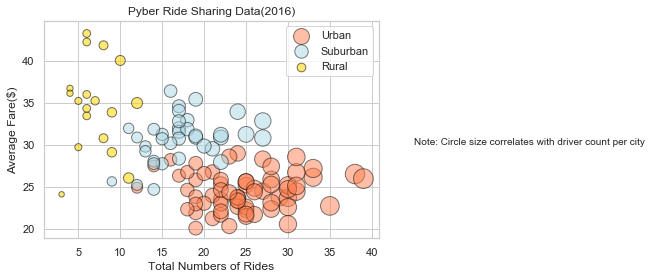

In [191]:
urban = pyber.loc[(pyber["type"] == "Urban")]
suburban = pyber.loc[(pyber["type"] == "Suburban")]
rural = pyber.loc[(pyber["type"] == "Rural")]
# calculate Average Fare, Total Rides and Total Drivers for Urban,Suburban,Rural
Avg_fare_urban = urban.groupby(['city'])['fare'].mean()
Total_rides_urban = urban.groupby(['city']).count()['ride_id']
Total_drivers_urban = urban.groupby(['city'])['driver_count'].value_counts()

Avg_fare_suburban = suburban.groupby(['city'])['fare'].mean()
Total_rides_suburban = suburban.groupby(['city']).count()['ride_id']
Total_drivers_suburban = suburban.groupby(['city'])['driver_count'].value_counts()

Avg_fare_rural = rural.groupby(['city'])['fare'].mean()
Total_rides_rural = rural.groupby(['city']).count()['ride_id']
Total_drivers_rural = rural.groupby(['city'])['driver_count'].value_counts()

# Create scatter plots for Urban, Suburban and Rural cities
plt.scatter(total_rides_urban, avg_fare_urban,s=total_drivers_urban*10,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban, avg_fare_suburban,s=total_drivers_suburban*10,
            marker ='o', facecolors ="lightblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural, avg_fare_rural,s=total_drivers_rural*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")
# Chart title
plt.title("Pyber Ride Sharing Data(2016)")
# x label
plt.xlabel("Total Numbers of Rides")
# y label
plt.ylabel("Average Fare($)")
plt.text(45, 30,"Note: Circle size correlates with driver count per city")

# legend 
plt.legend(loc='upper right')
plt.savefig("../Images/pyber Ride sharing.png")
plt.show()

## Total Fares by City Type

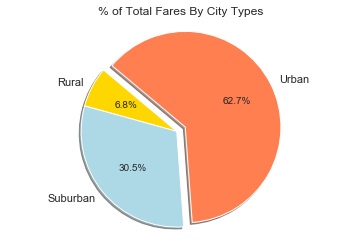

<Figure size 432x288 with 0 Axes>

In [192]:
# Calculate Type Percents
Total_Fares=pyber.groupby(["type"])["fare"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart

# The colors of each section of the pie chart
colors = ["gold", "lightblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0 , 0, 0.1)
plt.title("% of Total Fares By City Types")

plt.pie(Total_Fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal") 
plt.show()
# Save Figure
plt.savefig("../Images/Total Fares.png")


## Total Rides by City Type

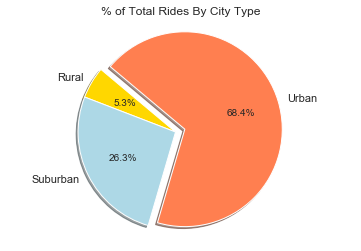

<Figure size 432x288 with 0 Axes>

In [193]:
# Calculate Ride Percents
Total_Rides=pyber.groupby(["type"])["ride_id"].count()
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightblue", "coral"]
explode = (0 , 0, 0.1)
plt.title("% of Total Rides By City Type")
plt.pie(Total_Rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal") 
plt.show()
# Save Figure
plt.savefig("../Images/Total Rides.png")

## Total Drivers by City Type

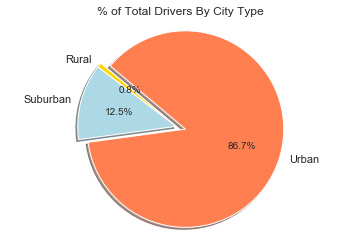

<Figure size 432x288 with 0 Axes>

In [194]:
# Calculate Driver Percents
Total_Drivers=pyber.groupby(["type"])["driver_count"].sum()
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightblue", "coral"]
explode = (0 , 0, 0.1)
plt.title("% of Total Drivers By City Type")
plt.pie(Total_Drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal") 
plt.show()
plt.savefig("../Images/Total Drivers.png")
